<a href="https://colab.research.google.com/github/andysingal/machine-learning/blob/main/Advanced_Linear_Regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p>In this chapter, we will discuss the main concepts of regression models and cover the following topics:
<ul>
<li>Exploring and visualizing datasets</li>
<li>Looking at different approaches to implementing linear regression models</li>
<li>Training regression models that are robust to outliers<li>
<li>Evaluating regression models and diagnosing common problems</li>
<li>Fitting regression models to nonlinear data</li>
</p>


#Exploring the Ames Housing dataset
Loading the Ames Housing dataset into a data frame
- Dataset source: http://jse.amstat.org/v19n3/decock/AmesHousing.txt
- Dataset documentation: http://jse.amstat.org/v19n3/decock/DataDocumentation.txt
- Dataset write-up: http://jse.amstat.org/v19n3/decock.pdf
- 'Overall Qual': Rates the overall material and finish of the house
<ul>
 <li>10	Very Excellent</li>
 <li>9	Excellent</li>
 <li>8	Very Good</li>
 </li>7	Good</li>
 - 6	Above Average
 - 5	Average
-  4	Below Average
-  3	Fair
 - 2	Poor
 - 1	Very Poor
 </ul>
'Overall Cond': Rates the overall condition of the house

-  10	Very Excellent
 - 9	Excellent
-  8	Very Good
 - 7	Good
 - 6	Above Average	
 - 5	Average
 - 4	Below Average	
 - 3	Fair
 - 2	Poor
-  1	Very Poor
'Gr Liv Area': Above grade (ground) living area square feet

'Central Air': Central air conditioning

 N	No
 Y	Yes

'Total Bsmt SF': Total square feet of basement area

'SalePrice': Sale price $$

In [39]:
!pip uninstall mlxtend

In [51]:
%%capture
!pip install mlxtend --upgrade

In [56]:
from IPython import display
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

from mlxtend.plotting import scatterplotmatrix
from mlxtend.plotting import heatmap

from sklearn.preprocessing import StandardScaler


columns = ['Overall Qual', 'Overall Cond', 'Gr Liv Area',
           'Central Air', 'Total Bsmt SF', 'SalePrice']

df = pd.read_csv('http://jse.amstat.org/v19n3/decock/AmesHousing.txt', 
                 sep='\t',
                 usecols=columns)
df['Central Air'] = df['Central Air'].map({'N': 0, 'Y': 1})
df = df.dropna(axis=0)
df.head()

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
0,6,5,1080.0,1,1656,215000
1,5,6,882.0,1,896,105000
2,6,6,1329.0,1,1329,172000
3,7,5,2110.0,1,2110,244000
4,5,5,928.0,1,1629,189900


In [55]:
mlxtend.__version__

NameError: ignored

In [42]:
#Check null values 
def checking_null_values(df):
    #create a for loop that will return which columns have null values 
    na_columns = [col for col in df.columns if df[col].isna().sum()>0]
    #We find the null values in the null columns this value or arranged in ascending order
    na_miss = df[na_columns].isna().sum().sort_values(ascending=False)
    #this will be multiplication with 100 converts into percentage 
    ratio = (df[na_columns].isna().sum()/df.shape[0]*100).sort_values(ascending=False)
    #concat the missing_values and percentage with np.round
    missing_df = pd.concat([na_miss,np.round(ratio,2)], axis=1,keys= ['Null Values', 'Percentage'])
    missing_df = pd.DataFrame(missing_df)
    return missing_df.style.background_gradient(cmap='winter_r')

checking_null_values(df)

,Null Values,Percentage


In [43]:
df.describe().style.format(precision=0, thousands=",")

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
count,"2,929","2,929","2,929","2,929","2,929","2,929"
mean,6,6,"1,052",1,"1,500","180,831"
std,1,1,441,0,505,"79,878"
min,1,1,0,0,334,"12,789"
25%,5,5,793,1,"1,126","129,500"
50%,6,5,990,1,"1,442","160,000"
75%,7,6,"1,302",1,"1,743","213,500"
max,10,9,"6,110",1,"5,642","755,000"


array([[<Axes: xlabel='Overall Qual', ylabel='Overall Qual'>,
        <Axes: xlabel='Overall Cond', ylabel='Overall Qual'>,
        <Axes: xlabel='Total Bsmt SF', ylabel='Overall Qual'>,
        <Axes: xlabel='Central Air', ylabel='Overall Qual'>,
        <Axes: xlabel='Gr Liv Area', ylabel='Overall Qual'>],
       [<Axes: xlabel='Overall Qual', ylabel='Overall Cond'>,
        <Axes: xlabel='Overall Cond', ylabel='Overall Cond'>,
        <Axes: xlabel='Total Bsmt SF', ylabel='Overall Cond'>,
        <Axes: xlabel='Central Air', ylabel='Overall Cond'>,
        <Axes: xlabel='Gr Liv Area', ylabel='Overall Cond'>],
       [<Axes: xlabel='Overall Qual', ylabel='Total Bsmt SF'>,
        <Axes: xlabel='Overall Cond', ylabel='Total Bsmt SF'>,
        <Axes: xlabel='Total Bsmt SF', ylabel='Total Bsmt SF'>,
        <Axes: xlabel='Central Air', ylabel='Total Bsmt SF'>,
        <Axes: xlabel='Gr Liv Area', ylabel='Total Bsmt SF'>],
       [<Axes: xlabel='Overall Qual', ylabel='Central Air'>,
    

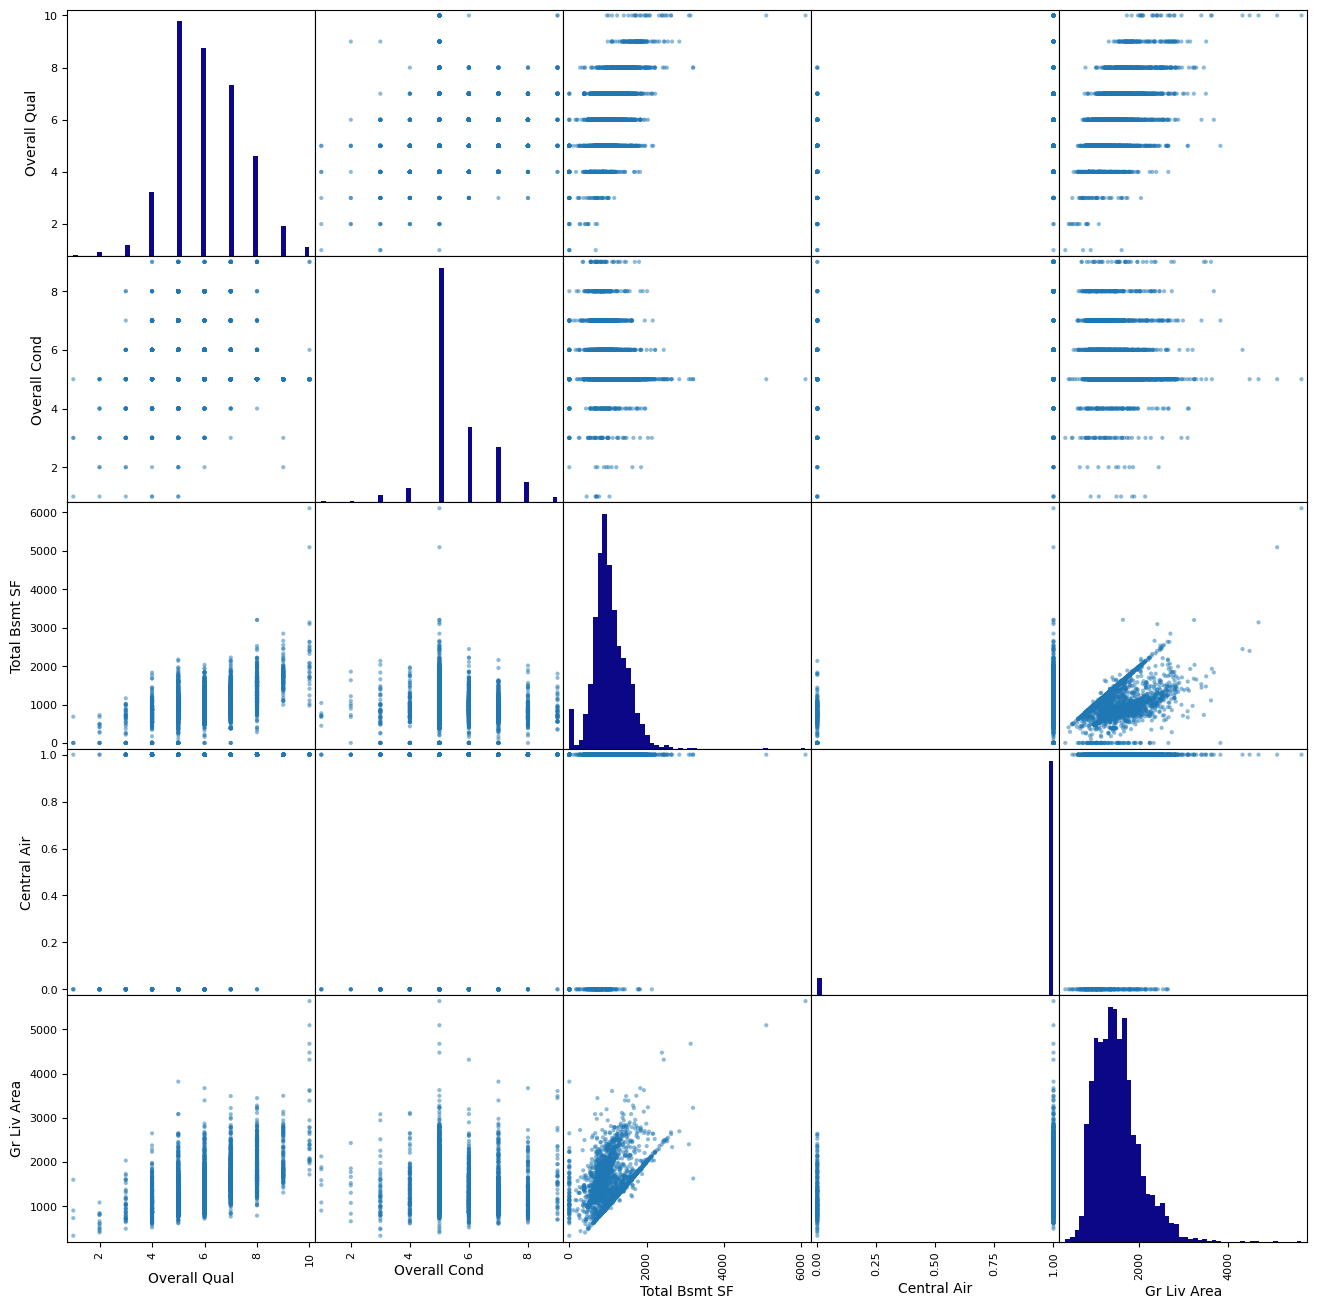

In [44]:
pd.plotting.scatter_matrix(df[["Overall Qual", "Overall Cond", 
                                      "Total Bsmt SF", "Central Air","Gr Liv Area"]][(df['SalePrice'] > 0)], 
                           hist_kwds={'bins': 50, 'color': '#0C0786'}, 
                           figsize=(16, 16))

#Visualizing the important characteristics of a dataset

<p>
Exploratory data analysis (EDA) is an important and recommended first step prior to the training of a machine learning model. In the rest of this section, we will use some simple yet useful techniques from the graphical EDA toolbox that may help us to visually detect the presence of outliers, the distribution of the data, and the relationships between features.

First, we will create a scatterplot matrix that allows us to visualize the pair-wise correlations between the different features in this dataset in one place. To plot the scatterplot matrix, we will use the scatterplotmatrix function from the mlxtend library (http://rasbt.github.io/mlxtend/), which is a Python library that contains various convenience functions for machine learning and data science applications in Python.

You can install the mlxtend package via conda install mlxtend or pip install mlxtend. For this chapter, we used mlxtend version 0.19.0.
</p>

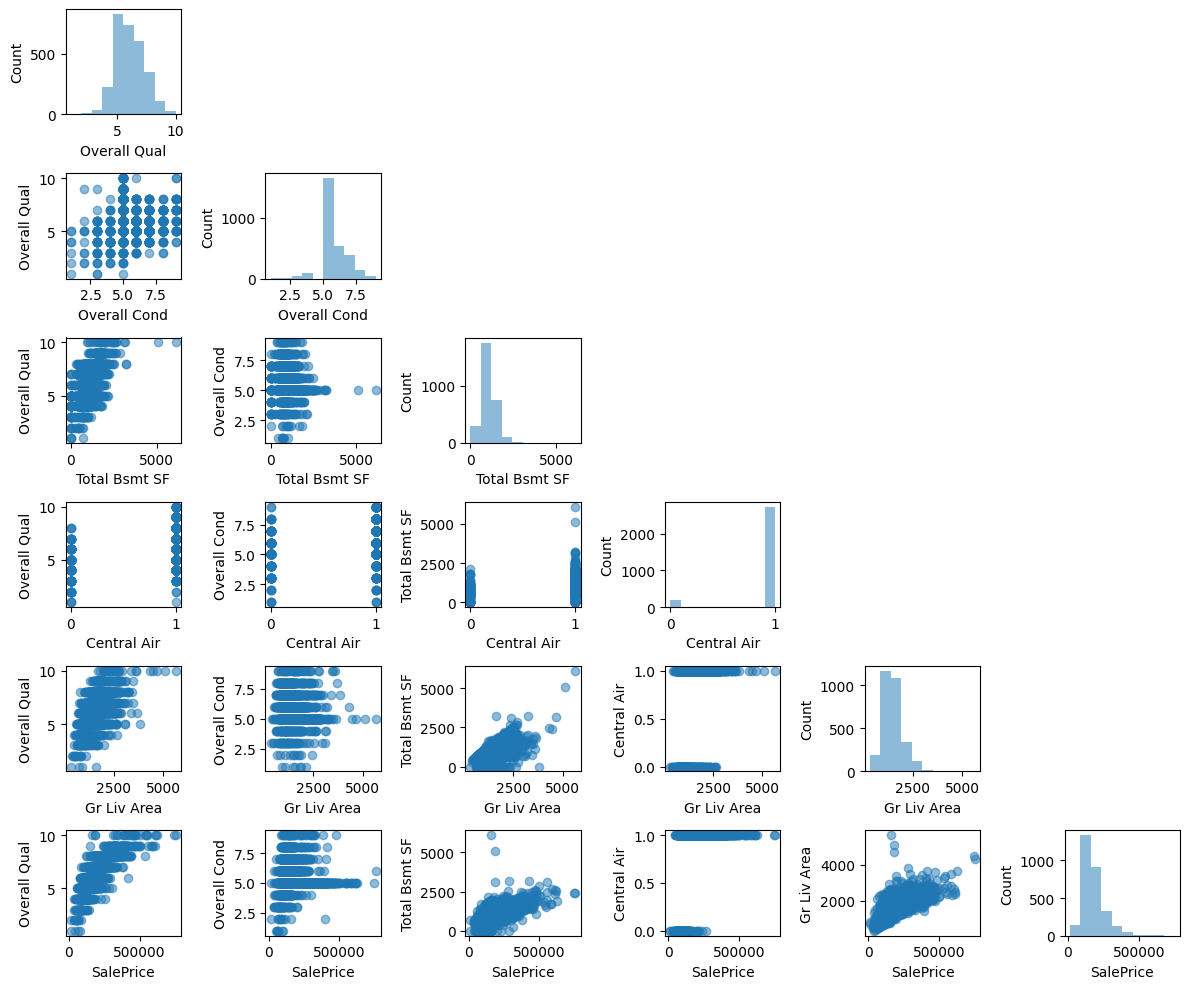

In [45]:
scatterplotmatrix(df.values, figsize=(12, 10), 
                  names=df.columns, alpha=0.5)
plt.tight_layout()
#plt.savefig('figures/09_04.png', dpi=300)
plt.show()

In [53]:
from mlxtend.plotting import heatmap

cm = np.corrcoef(df.values.T)
hm = heatmap(cm, row_names = df.columns, column_names = df.columns, figsize = (20, 20))
plt.title('Correlations Between the Different Features of the Data', fontsize = 20)
plt.show()

TypeError: ignored

#Implementing an ordinary least squares linear regression model

#Solving regression for regression parameters with gradient descent

In [47]:
class LinearRegressionGD:
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.array([0.])
        self.losses_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()
            loss = (errors**2).mean()
            self.losses_.append(loss)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_

    def predict(self, X):
        return self.net_input(X)


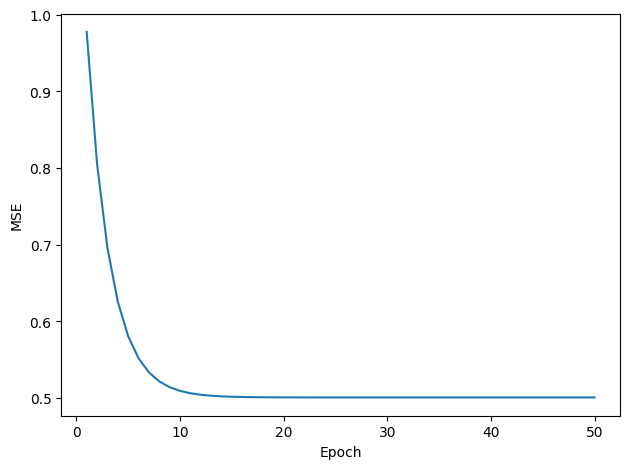

In [50]:
X = df[['Gr Liv Area']].values
y = df['SalePrice'].values

sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()

lr = LinearRegressionGD(eta=0.1)
lr.fit(X_std, y_std)

plt.plot(range(1, lr.n_iter+1), lr.losses_)
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.tight_layout()
#plt.savefig('figures/09_06.png', dpi=300)
plt.show()

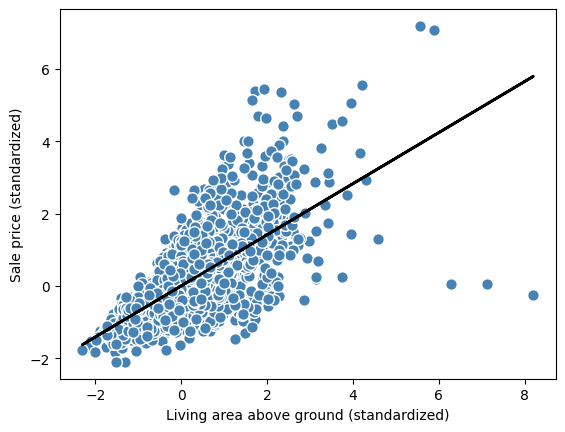

In [57]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)    
    return 


lin_regplot(X_std, y_std, lr)
plt.xlabel('Living area above ground (standardized)')
plt.ylabel('Sale price (standardized)')

#plt.savefig('figures/09_07.png', dpi=300)
plt.show()   

In [58]:
feature_std = sc_x.transform(np.array([[2500]]))
target_std = lr.predict(feature_std)
target_reverted = sc_y.inverse_transform(target_std.reshape(-1, 1))
print(f'Sale price: ${target_reverted.flatten()[0]:.2f}')


Sale price: $292507.07


In this code example, we used the previously trained linear regression model to predict the price of a house with an aboveground living area of 2,500 square feet. According to our model, such a house will be worth $292,507.07.

#Estimating the coefficient of a regression model via scikit-learn

Slope: 111.666
Intercept: 13342.979


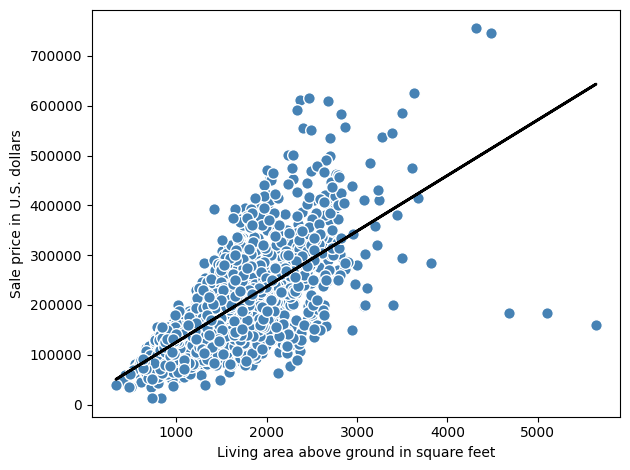

In [59]:
from sklearn.linear_model import LinearRegression

slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)
print(f'Slope: {slr.coef_[0]:.3f}')
print(f'Intercept: {slr.intercept_:.3f}')

lin_regplot(X, y, slr)
plt.xlabel('Living area above ground in square feet')
plt.ylabel('Sale price in U.S. dollars')

plt.tight_layout()
#plt.savefig('figures/09_08.png', dpi=300)
plt.show()

#Fitting a robust regression model using RANSAC

<p>Linear regression models can be heavily impacted by the presence of outliers. In certain situations, a very small subset of our data can have a big effect on the estimated model coefficients. Many statistical tests can be used to detect outliers, but these are beyond the scope of the book. However, removing outliers always requires our own judgment as data scientists as well as our domain knowledge.</p>

<p>As an alternative to throwing out outliers, we will look at a robust method of regression using the RANdom SAmple Consensus (RANSAC) algorithm, which fits a regression model to a subset of the data, the so-called inliers.</p>

We can summarize the iterative RANSAC algorithm as follows:

- Select a random number of examples to be inliers and fit the model.
- Test all other data points against the fitted model and add those points that fall within a user-given tolerance to the inliers.
- Refit the model using all inliers.
- Estimate the error of the fitted model versus the inliers.
- Terminate the algorithm if the performance meets a certain user-defined threshold or if a fixed number of iterations was reached; go back to step 1 otherwise.


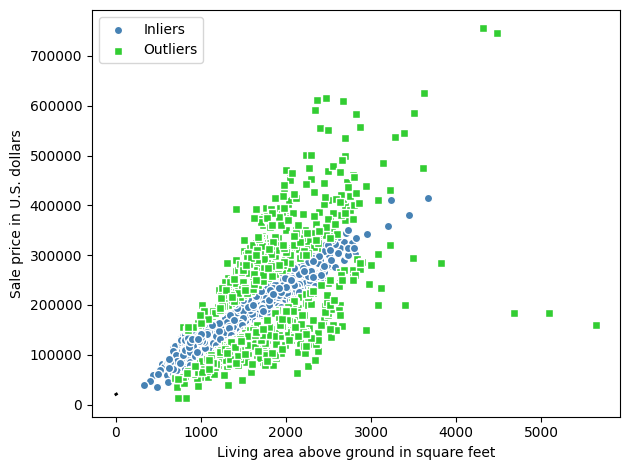

In [60]:
from sklearn.linear_model import RANSACRegressor


ransac = RANSACRegressor(LinearRegression(), 
                         max_trials=100, # default
                         min_samples=0.95, 
                         loss='absolute_error', # default
                         residual_threshold=None, # default 
                         random_state=123)


ransac.fit(X, y)

inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask],
            c='steelblue', edgecolor='white', 
            marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],
            c='limegreen', edgecolor='white', 
            marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='black', lw=2)   
plt.xlabel('Living area above ground in square feet')
plt.ylabel('Sale price in U.S. dollars')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('figures/09_09.png', dpi=300)
plt.show()

In [61]:
print(f'Slope: {ransac.estimator_.coef_[0]:.3f}')
print(f'Intercept: {ransac.estimator_.intercept_:.3f}')

Slope: 106.348
Intercept: 20190.093


Remember that we set the residual_threshold parameter to None, so RANSAC was using the MAD to compute the threshold for flagging inliers and outliers. The MAD, for this dataset, can be computed as follows:

In [62]:
def median_absolute_deviation(data):
    return np.median(np.abs(data - np.median(data)))
    
median_absolute_deviation(y)

37000.0

**Using RANSAC, we reduced the potential effect of the outliers in this dataset, but we don’t know whether this approach will have a positive effect on the predictive performance for unseen data or not. Thus, in the next section, we will look at different approaches for evaluating a regression model, which is a crucial part of building systems for predictive modeling.**

#Evaluating the performance of linear regression models